
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,12.80,-42.09,-23.78,-8.93,-1.91,16.75,8.60,20.81,-1.91,-39.75
1,AXP,American Express,US Stocks:Financials,-27.73,69.23,26.40,18.18,19.49,22.51,15.10,30.07,19.49,0.65
2,AMGN,Amgen,US Stocks:Healthcare,122.83,51.15,0.53,15.33,12.55,13.33,7.35,24.48,12.55,0.51
3,AAPL,Apple,US Stocks:Technology,-45.60,-1.02,21.17,47.49,36.95,24.78,16.56,30.16,36.95,1.23
4,BA,Boeing,US Stocks:Industrials,-45.29,-45.00,-25.78,-21.57,0.96,30.61,17.69,48.02,0.96,0.02
5,CAT,Caterpillar,US Stocks:Industrials,-23.20,6.21,-4.06,19.20,21.00,30.95,23.31,27.03,21.00,0.78
6,CVX,Chevron,US Stocks:Energy,-30.27,169.73,66.20,16.36,13.93,27.51,19.16,34.56,13.93,0.40
7,CSCO,Cisco,US Stocks:Technology,-46.52,-30.72,1.59,-0.43,12.73,20.51,14.14,27.71,12.73,0.46
8,KO,Coca-Cola,US Stocks:Consumer Staples,152.65,39.95,23.49,14.35,12.24,11.56,5.88,19.94,12.24,0.61
9,DIS,Disney,US Stocks:Communication Services,-83.80,-45.07,-35.38,-3.95,1.54,31.22,22.57,32.99,1.54,0.05


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
20,MSFT,Microsoft,US Stocks:Technology,-65.57,-25.96,5.79,31.27,34.62,29.20,20.21,21.24,34.62,1.63
3,AAPL,Apple,US Stocks:Technology,-45.60,-1.02,21.17,47.49,36.95,24.78,16.56,30.16,36.95,1.23
25,UNH,UnitedHealth,US Stocks:Healthcare,51.44,64.76,31.89,33.30,26.81,22.58,13.38,24.02,26.81,1.12
29,WMT,Walmart,US Stocks:Consumer Discretionary,231.53,59.18,13.87,16.82,18.21,19.47,9.47,16.98,18.21,1.07
22,PG,Procter & Gamble,US Stocks:Consumer Staples,138.59,-1.14,23.24,18.71,15.87,16.07,5.74,16.46,15.87,0.96
18,MCD,McDonald's,US Stocks:Consumer Staples,100.09,-4.67,9.02,10.74,16.15,15.66,8.18,18.91,16.15,0.85
5,CAT,Caterpillar,US Stocks:Industrials,-23.20,6.21,-4.06,19.20,21.00,30.95,23.31,27.03,21.00,0.78
27,V,Visa,US Stocks:Financials,-30.89,5.10,-8.93,9.51,18.72,26.21,17.13,24.59,18.72,0.76
21,NKE,Nike,US Stocks:Consumer Discretionary,-30.23,-32.93,-0.09,14.48,19.46,36.94,20.60,26.84,19.46,0.73
12,HD,Home Depot,US Stocks:Consumer Discretionary,-48.26,-44.05,-5.43,15.88,17.57,30.16,18.12,26.13,17.57,0.67


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MSFT,AAPL,UNH,WMT,PG,MCD,CAT,V,NKE,HD,...,KO,JNJ,MRK,AMGN,VZ,HON,TRV,CSCO,CRM,Ranked Portfolio
Annual Returns,34.62,36.95,26.81,18.21,15.87,16.15,21.00,18.72,19.46,17.57,...,12.24,11.21,10.85,12.55,6.57,11.60,10.34,12.73,15.39,17.33
Std Dev,21.24,30.16,24.02,16.98,16.46,18.91,27.03,24.59,26.84,26.13,...,19.94,18.55,21.08,24.48,13.18,23.55,21.54,27.71,35.05,18.55
Sharpe Ratio,1.63,1.23,1.12,1.07,0.96,0.85,0.78,0.76,0.73,0.67,...,0.61,0.60,0.51,0.51,0.50,0.49,0.48,0.46,0.44,0.93
Weight,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.05,0.05,...,0.05,0.05,0.05,0.05,0.08,0.05,0.03,0.06,0.06,1.00
Worst Typical Down Year,-7.86,-23.37,-21.23,-15.75,-17.05,-21.67,-33.06,-30.46,-34.22,-34.69,...,-27.64,-25.89,-31.31,-36.41,-19.79,-35.50,-32.74,-42.69,-54.71,-19.77
Black Swan,-29.10,-53.53,-45.25,-32.73,-33.51,-40.58,-60.09,-55.05,-61.06,-60.82,...,-47.58,-44.44,-52.39,-60.89,-32.97,-59.05,-54.28,-70.40,-89.76,-38.32


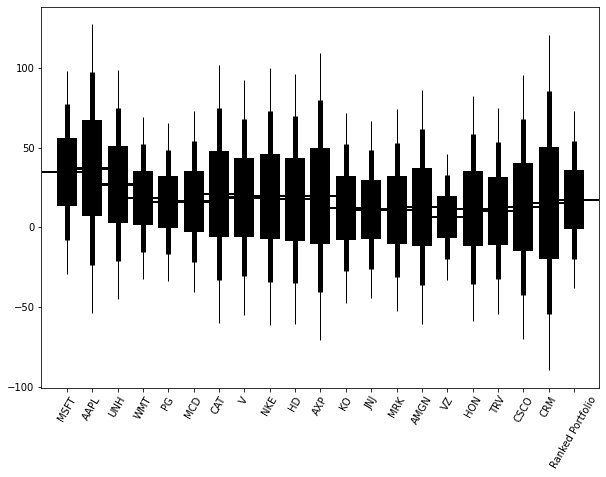

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

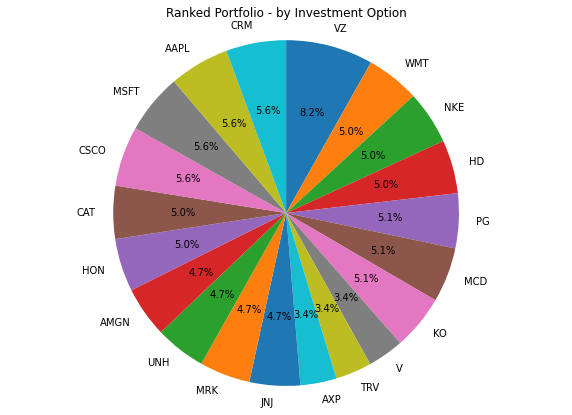

VZ     0.08
WMT    0.05
NKE    0.05
HD     0.05
PG     0.05
MCD    0.05
KO     0.05
V      0.03
TRV    0.03
AXP    0.03
JNJ    0.05
MRK    0.05
UNH    0.05
AMGN   0.05
HON    0.05
CAT    0.05
CSCO   0.06
MSFT   0.06
AAPL   0.06
CRM    0.06



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MSFT                           0.0561
    AAPL                           0.0561
    UNH                            0.0474
    WMT                            0.0500
    PG                             0.0513
    MCD                            0.0513
    CAT                            0.0495
    V                              0.0338
    NKE                            0.0500
    HD                             0.0500
    AXP                            0.0338
    KO                             0.0513
    JNJ                            0.0474
    MRK                            0.0474
    AMGN                           0.0474
    VZ                             0.0816
    HON                            0.0495
    TRV                            0.0338
    CSCO                           0.0561
    CRM                            0.0561


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.20
    annual_return              19.75
    std_dev                    16.45
    worst typical down year   -13.15
    black_swan                -29.60


Ranked Portfolio Weights:
    MSFT                           0.1000
    AAPL                           0.1200
    UNH                            0.0400
    WMT                            0.1100
    PG                             0.1200
    MCD                            0.1200
    CAT                            0.0300
    V                              0.0000
    NKE                            0.0000
    HD                             0.0500
    AXP                            0.0400
    KO                             0.0500
    JNJ                            0.1000
    MRK                            0.0300
    AMGN                           0.0000
    VZ                             0.0900
    HON                            0.0000
    

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).